## Fetching Data

##### Import Package and Data

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [292]:
salary_df = pd.read_csv("salary.csv")
salary_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [293]:
salary_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [294]:
salary_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [295]:
salary_df = pd.concat([salary_df.drop('occupation', axis=1), pd.get_dummies(salary_df['occupation']).add_prefix("occupation_")], axis=1)
salary_df = pd.concat([salary_df.drop('workclass', axis=1), pd.get_dummies(salary_df['workclass']).add_prefix("workclass_")], axis=1)
salary_df = pd.concat([salary_df.drop('marital-status', axis=1), pd.get_dummies(salary_df['marital-status']).add_prefix("marital-status_")], axis=1)
salary_df = pd.concat([salary_df.drop('relationship', axis=1), pd.get_dummies(salary_df['relationship']).add_prefix("relationship_")], axis=1)
salary_df = pd.concat([salary_df.drop('race', axis=1), pd.get_dummies(salary_df['race']).add_prefix("race_")], axis=1)
salary_df = pd.concat([salary_df.drop('native-country', axis=1), pd.get_dummies(salary_df['native-country']).add_prefix("native-country_")], axis=1)

salary_df = salary_df.drop('education', axis=1)

In [296]:
salary_df['sex'] = salary_df['sex'].str.strip().apply(lambda x: 1 if x == 'Male' else 0)
salary_df['salary'] = salary_df['salary'].str.strip().apply(lambda x: 1 if x == '>50K' else 0)


In [297]:
salary_df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,1,2174,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,1,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


<Axes: >

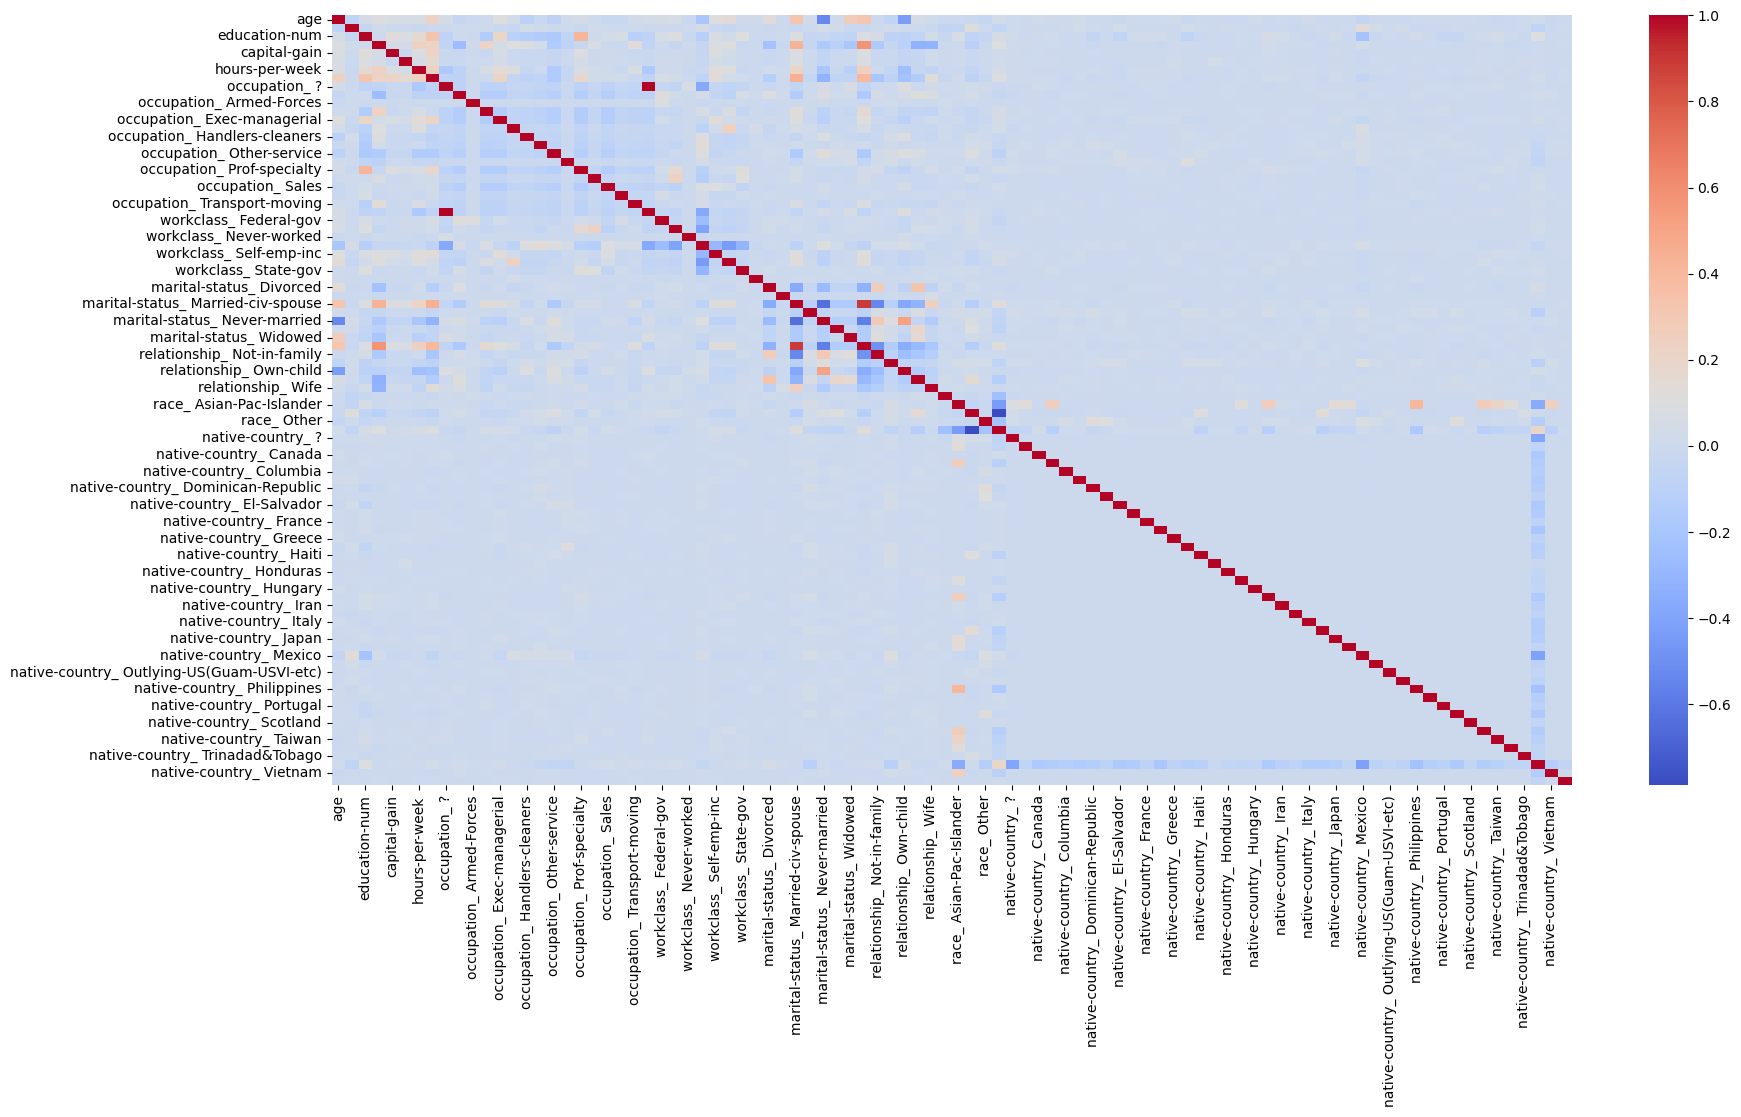

In [298]:
plt.figure(figsize=(20, 10))
sns.heatmap(salary_df.corr(), annot=False, cmap='coolwarm')

In [299]:
correlations = salary_df.corr()['salary'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(salary_df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = salary_df.drop(cols_to_drop, axis=1)

In [300]:
df_dropped

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Prof-specialty,workclass_ Self-emp-inc,marital-status_ Divorced,marital-status_ Married-civ-spouse,marital-status_ Never-married,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,13,1,2174,0,40,0,False,False,False,False,False,False,True,False,True,False,False,False
1,50,13,1,0,0,13,0,True,False,False,False,False,True,False,True,False,False,False,False
2,38,9,1,0,0,40,0,False,False,False,False,True,False,False,False,True,False,False,False
3,53,7,1,0,0,40,0,False,False,False,False,False,True,False,True,False,False,False,False
4,28,13,0,0,0,40,0,False,False,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
32557,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
32558,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
32559,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

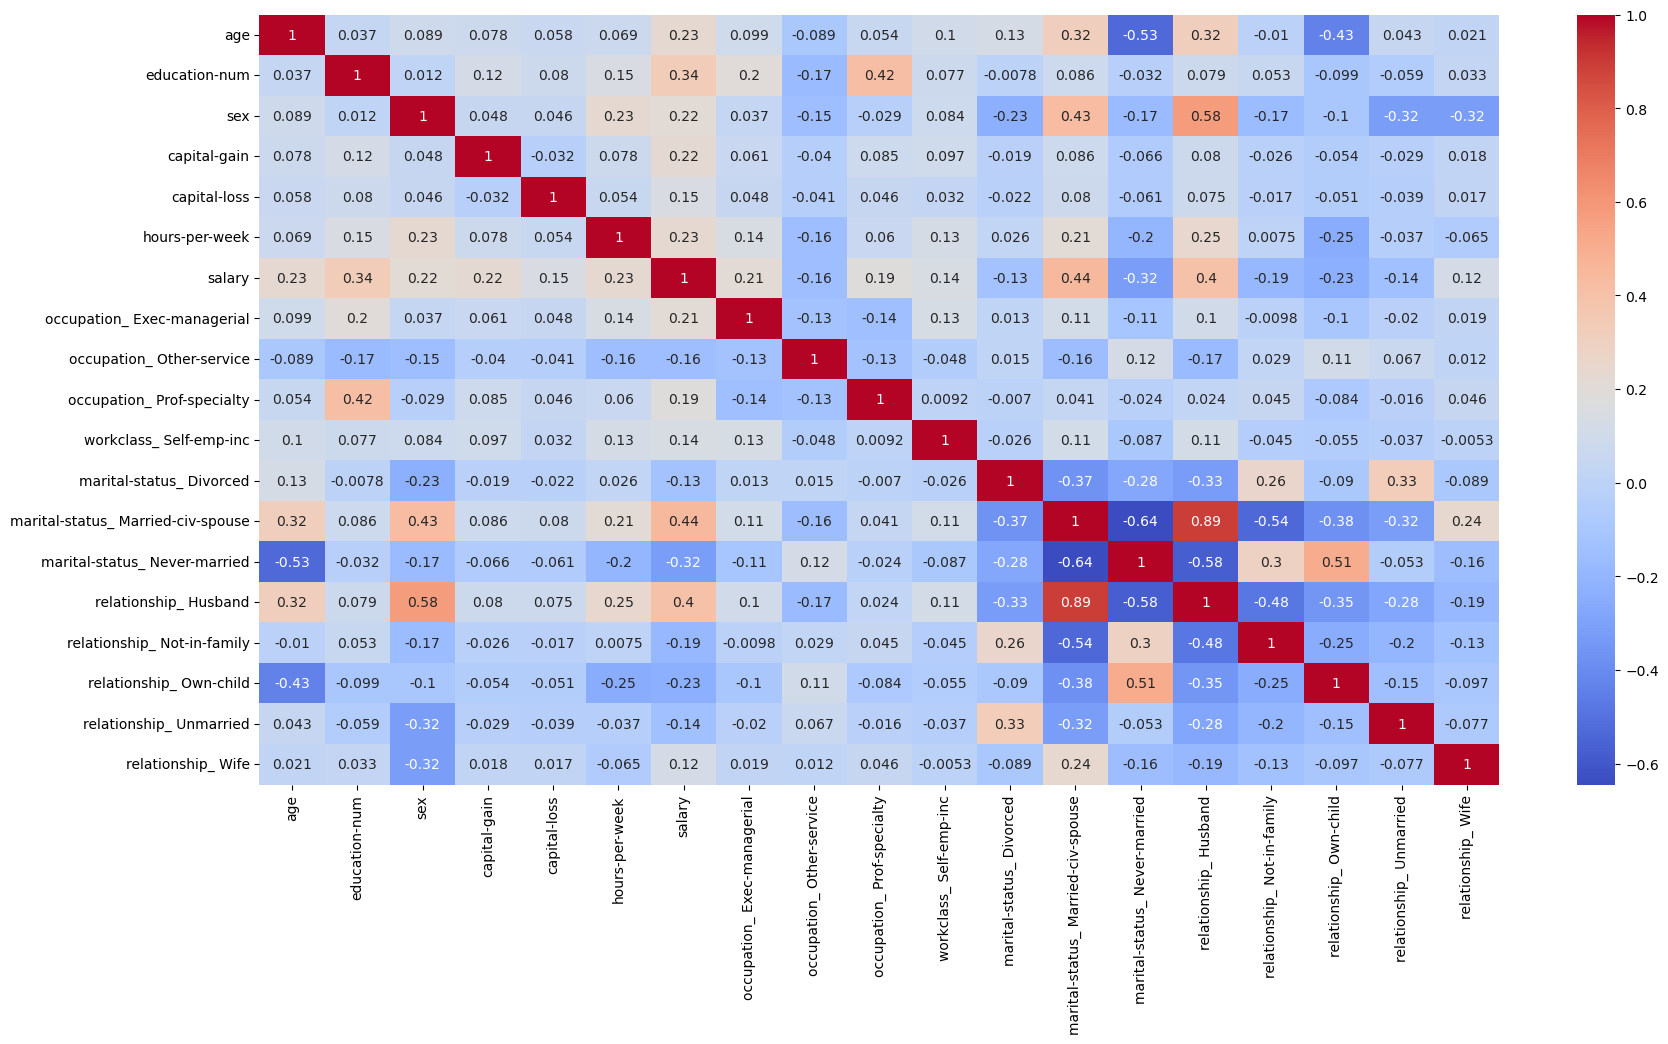

In [301]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [302]:
train_df, test_df = train_test_split(salary_df, test_size=0.2)

In [303]:
train_df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
24734,33,55291,14,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
6919,27,47907,13,0,0,0,48,0,False,False,...,False,False,False,False,False,False,False,True,False,False
12544,43,186995,9,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
24108,41,344624,13,1,0,0,50,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4759,76,97077,6,0,0,0,12,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23231,36,182863,13,1,0,0,50,1,False,False,...,False,False,False,False,False,False,False,True,False,False
26934,24,452640,10,1,14344,0,50,1,False,False,...,False,False,False,False,False,False,False,True,False,False
20799,40,96509,10,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
23745,48,431513,6,1,0,0,65,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [304]:
test_df

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
26694,22,134746,6,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
5073,48,192894,16,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
27488,27,419146,3,1,0,0,75,0,False,False,...,False,False,False,False,False,False,False,False,False,False
7927,30,172822,11,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
21537,51,177487,9,1,0,0,40,0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32560,52,287927,9,0,15024,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
32556,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
7406,19,393712,9,0,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False
11744,34,97723,15,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [305]:
train_X = train_df.drop('salary', axis=1)
train_y = train_df['salary']

test_X = test_df.drop('salary', axis=1)
test_y = test_df['salary']

In [306]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [307]:
forest.score(test_X, test_y)

0.8567480423767849

In [308]:
from sklearn.naive_bayes import GaussianNB


gaussian = GaussianNB()
gaussian.fit(train_X, train_y)


GaussianNB()

In [309]:
gaussian.score(test_X,test_y)

0.7919545524335944